# Pre Test set

x is 224 and y is 224 and z is 11
(50176, 11)


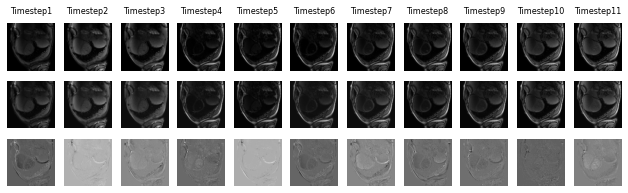

In [1]:
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from hyperspy.learn.rpca import rpca_godec, orpca
path = 'data/MOLLI_pre_dataset/test/0387056_20140423_MOLLI_3.npy'
vols = np.load(path).transpose(1, 2, 0)
x, y, z = vols.shape
print(f"x is {x} and y is {y} and z is {z}")
M = vols.reshape(x*y, z)
print(M.shape)
low, sparse, U, S, V = rpca_godec(M, rank=5)
low_matrix = low.reshape((x, y, z))
sparse_matrix = sparse.reshape((x, y, z))

fig = plt.figure(figsize=(11, 3))
title_font_size=8
title_pad = 10
for i in range(z):
    ax1 = fig.add_subplot(3, 11, 1+i)
    plt.imshow(vols[..., i], cmap='gray')
    plt.axis('off')
    ax1.set_title(f"Timestep{i+1}", fontsize=title_font_size, pad=title_pad)

    ax2 = fig.add_subplot(3, 11, 12+i)
    plt.imshow(low_matrix[..., i], cmap='gray')
    plt.axis('off')

    ax3 = fig.add_subplot(3, 11, 23+i)
    plt.imshow(sparse_matrix[..., i], cmap='gray')
    plt.axis('off')

## Test Metrics

### Original volume

#### First Eigen Component percentage

In [2]:
from scripts.utils import *
orig_path = 'data/MOLLI_pre_dataset/test'
orig_pca_changes = []
for file in sorted(glob.glob(os.path.join(orig_path, '*.npy'))):
    vols = np.load(file).transpose(1, 2, 0)
    eig_org, org_K, org_dis = pca(vols, topk=1)
    orig_pca_changes.append(org_dis)
print(f"Mean of original PCA is {np.mean(np.array(orig_pca_changes))}")

Mean of original PCA is 0.7867720274668718


#### T1 fitting

In [3]:
import scipy.io
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_t1_changes(fig, path, subject_list, orig_t1err_square_list, orig_t1err_heart_list):
    for i, file in enumerate(sorted(glob.glob(os.path.join(path, '*.mat')))):
        subject = Path(file).stem
        subject_list.append(subject)
        fd = scipy.io.loadmat(file)
        SD_err = fd['S']
        areamask = fd['areamask']
        itemindex = np.where(areamask == 1)
        x1, x2 = itemindex[0][0], itemindex[0][-1]
        y1, y2 = itemindex[1][0], itemindex[1][-1]
        heartmask = fd['epi_BW']
        errmap = SD_err * areamask

        orig_t1err_square_list.append(np.mean(errmap[areamask==1]))
        fig.add_subplot(10, 4, 1+i*4)
        ax = plt.gca()
        im = ax.imshow(errmap[x1:x2, y1:y2], cmap='jet', vmin=0, vmax=50)
        ax.axis('off')
        ax.set_title(f"{subject}", fontsize=title_font_size, pad=title_pad)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)

        t1_params_pre = fd['pmap_mse']
        a = t1_params_pre[:, :, 0]
        b = t1_params_pre[:, :, 1]
        c = t1_params_pre[:, :, 2]
        t1map = c * (b - 1)
        fig.add_subplot(10, 4, 2+i*4)
        ax = plt.gca()
        im = ax.imshow(t1map[x1:x2, y1:y2], cmap='jet', vmin=0, vmax=2500)
        ax.axis('off')
        ax.set_title(f"{subject}", fontsize=title_font_size, pad=title_pad)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)

        hearterrmap = SD_err * heartmask
        heartt1map = t1map * heartmask
        orig_t1err_heart_list.append(np.mean(hearterrmap[heartmask==1]))

        fig.add_subplot(10, 4, 3+i*4)
        ax = plt.gca()
        im = ax.imshow(hearterrmap[x1:x2, y1:y2], cmap='jet', vmin=0, vmax=50)
        ax.axis('off')
        ax.set_title(f"{subject}", fontsize=title_font_size, pad=title_pad)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)

        fig.add_subplot(10, 4, 4+i*4)
        ax = plt.gca()
        im = ax.imshow(heartt1map[x1:x2, y1:y2], cmap='jet', vmin=0, vmax=2500)
        ax.axis('off')
        ax.set_title(f"{subject}", fontsize=title_font_size, pad=title_pad)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
    plt.subplots_adjust(left=0.0001,right=0.9, top=0.95, bottom=0.1,)
    return fig, subject_list, orig_t1err_square_list, orig_t1err_heart_list

Mean of t1err is 11.072921129848977 and std is 4.963850319538608
Mean of t1err is 14.217012343355398 and std is 7.345939012337131


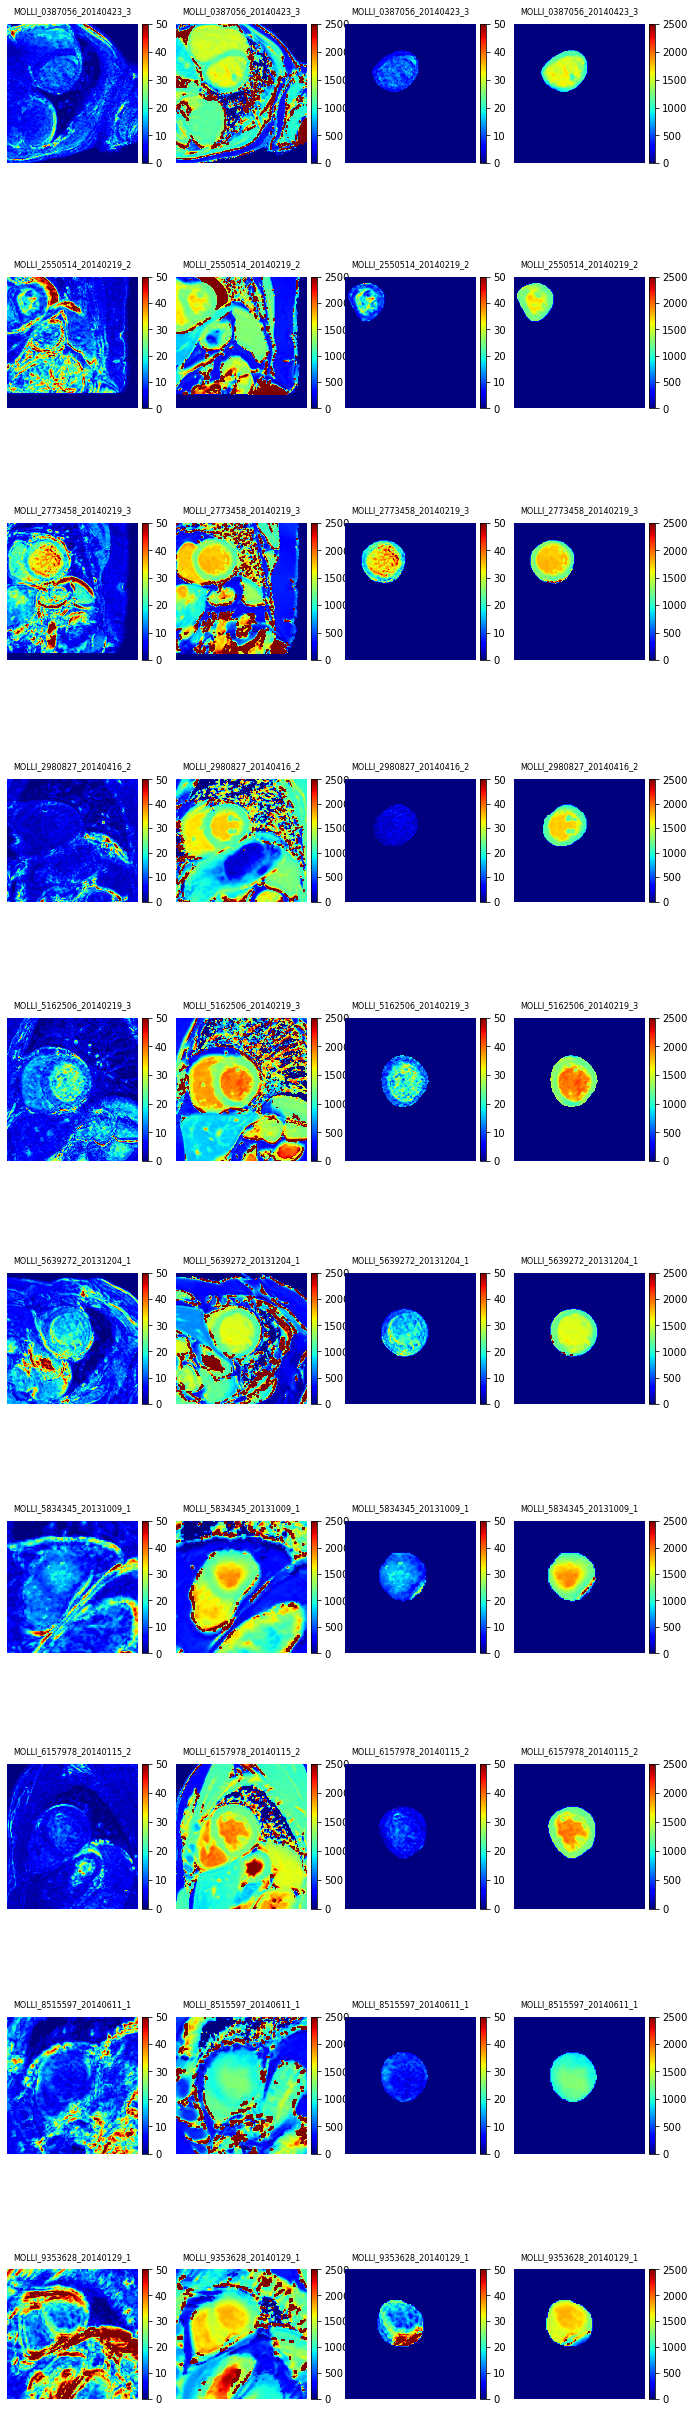

In [4]:
path = "data/MOLLI_pre_dataset/T1_SDerr"
# print(path)
fig = plt.figure(figsize=(10,40))
title_font_size=8
title_pad = 10
orig_t1err_square_list = []
orig_t1err_heart_list = []
subject_list = []

fig, subject_list, orig_t1err_square_list, orig_t1err_heart_list = plot_t1_changes(fig, path, subject_list, orig_t1err_square_list, orig_t1err_heart_list)

print(f"Mean of t1err is {np.mean(np.array(orig_t1err_square_list))} and std is {np.std(np.array(orig_t1err_square_list))}")
print(f"Mean of t1err is {np.mean(np.array(orig_t1err_heart_list))} and std is {np.std(np.array(orig_t1err_heart_list))}")
plt.savefig(f"data/MOLLI_pre_dataset/T1_SDerr/orig_t1err.png", dpi=300)

### Round 1

In [5]:
import voxelmorph_group as vxm  # nopep8
import numpy as np
import glob
import os
jacobian = vxm.losses.Jacobian().loss

In [6]:
r = 1
root = f"results/MOLLI_pre/group/rank_10_5_3/nmi/smooth/image_loss_weight1/cycle_loss_weight0.01/weight0.001/bspline/cps4_svfsteps7_svfscale1/e80/test_MOLLI_pre"
base_path = f"{root}/round{r}"

#### First Eigen Component percentage

In [7]:
path = f"{base_path}/moved"
r1_pca_changes = []
for file in sorted(glob.glob(os.path.join(path, '*.npy'))):
    vols = np.load(file).transpose(1, 2, 0)
    eig_org, org_K, org_dis = pca(vols, topk=1)
    r1_pca_changes.append(org_dis)
print(f"Mean of Round 1 PCA is {np.mean(np.array(r1_pca_changes))} and std is {np.std(np.array(r1_pca_changes))}")

Mean of Round 1 PCA is 0.7940869564502003 and std is 0.023735150543747974


#### Jacobian Determination

In [8]:
r1_folding_ratio_list = []
r1_mag_det_jac_det_list = []
path = f"{base_path}/warp"
for file in sorted(glob.glob(os.path.join(path, '*.nii'))):
    disp = vxm.py.utils.load_volfile(file).transpose(2, 3, 0, 1)
    folding_ratio, mag_det_jac_det = jacobian(disp)
    r1_folding_ratio_list.append(folding_ratio)
    r1_mag_det_jac_det_list.append(mag_det_jac_det)

print(f"Mean of folding ratio is {np.mean(np.array(r1_folding_ratio_list))}")
print(f"Mean of mag det jac det is {np.mean(np.array(r1_mag_det_jac_det_list))}")

Mean of folding ratio is 0.0
Mean of mag det jac det is 0.0025393501855432987


#### T1 fitting

Mean of t1err is 10.052175695785031 and std is 4.394130836276825
Mean of t1err is 13.756770124071485 and std is 7.038104965899486


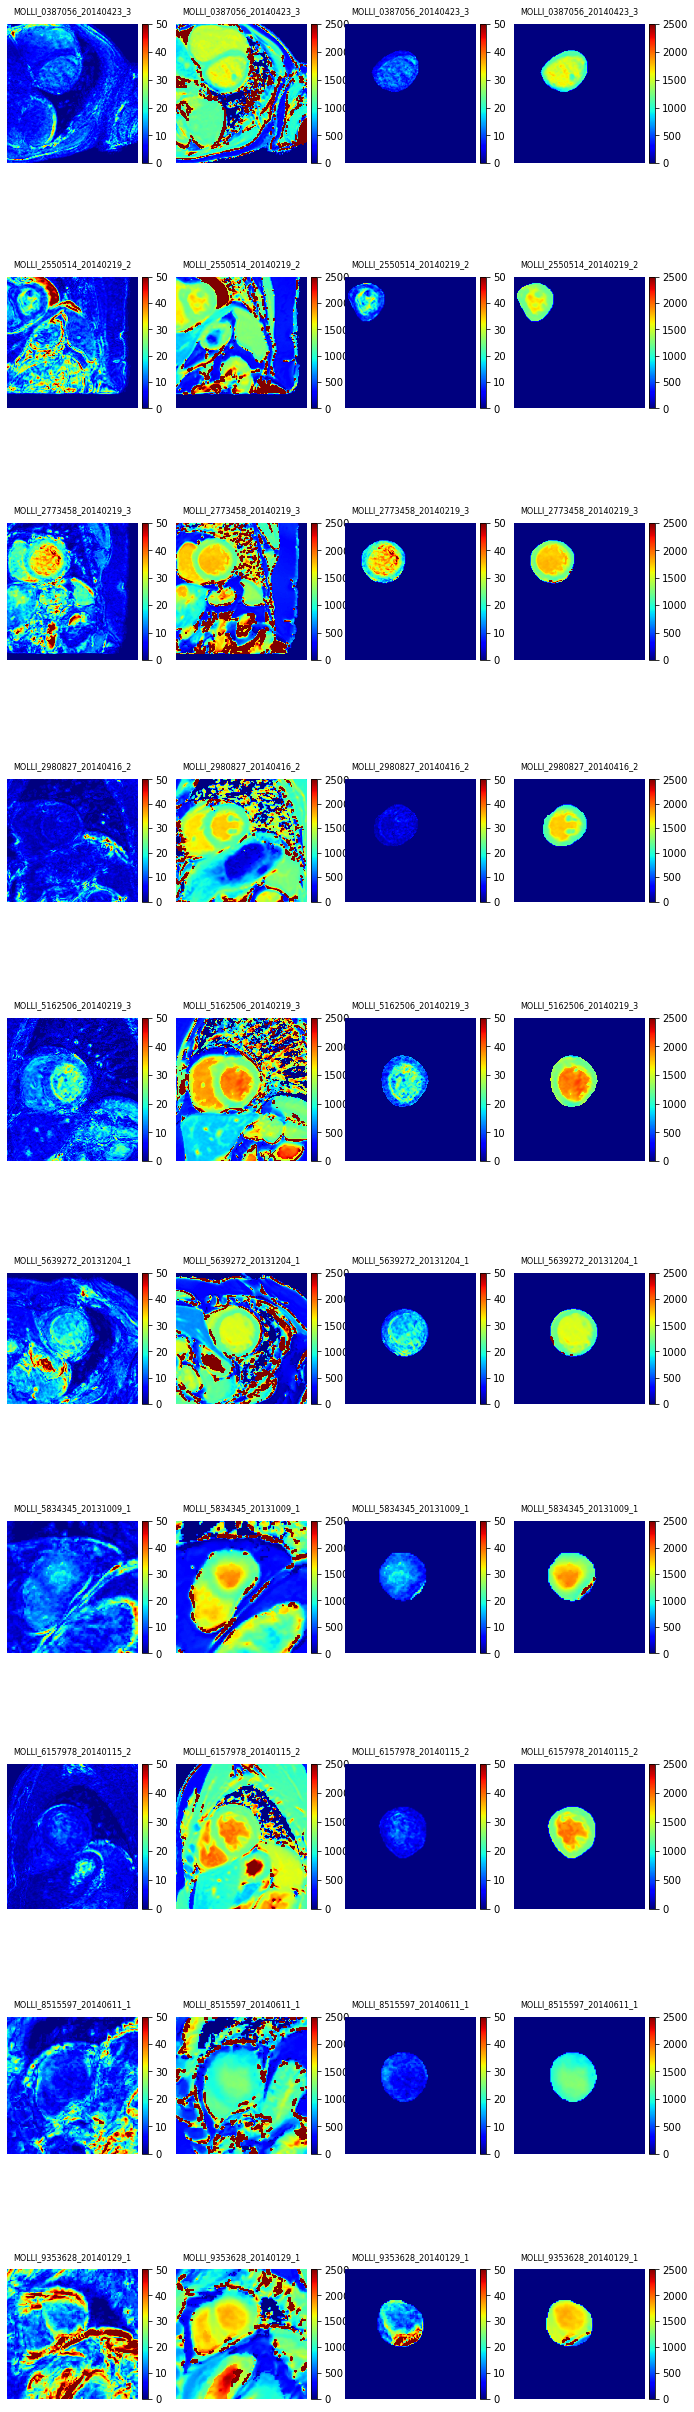

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.io
from pathlib import Path
# %matplotlib widget
path = f"{base_path}/t1_SDerr"
# print(path)
fig = plt.figure(figsize=(10,40))
title_font_size=8
title_pad = 10
r1_t1err_square_list = []
r1_t1err_heart_list = []
subject_list = []

fig, subject_list, r1_t1err_square_list, r1_t1err_heart_list = plot_t1_changes(fig, path, subject_list, r1_t1err_square_list, r1_t1err_heart_list)

print(f"Mean of t1err is {np.mean(np.array(r1_t1err_square_list))} and std is {np.std(np.array(r1_t1err_square_list))}")
print(f"Mean of t1err is {np.mean(np.array(r1_t1err_heart_list))} and std is {np.std(np.array(r1_t1err_heart_list))}")
plt.savefig(f"{base_path}/t1_SDerr.png", dpi=300)

### Round 2

In [10]:
r = 2
base_path = f"{root}/round{r}"

#### First Eigen Component percentage

In [11]:
path = f"{base_path}/moved"
r2_pca_changes = []
for file in sorted(glob.glob(os.path.join(path, '*.npy'))):
    vols = np.load(file).transpose(1, 2, 0)
    eig_org, org_K, org_dis = pca(vols, topk=1)
    r2_pca_changes.append(org_dis)
print(f"Mean of Round 2 PCA is {np.mean(np.array(r2_pca_changes))} and std is {np.std(np.array(r2_pca_changes))}")

Mean of Round 2 PCA is 0.7975744115408316 and std is 0.0232084897093461


#### Jacobian Determination

In [12]:
r2_folding_ratio_list = []
r2_mag_det_jac_det_list = []
path = f"{base_path}/warp"
for file in sorted(glob.glob(os.path.join(path, '*.nii'))):
    disp = vxm.py.utils.load_volfile(file).transpose(2, 3, 0, 1)
    folding_ratio, mag_det_jac_det = jacobian(disp)
    r2_folding_ratio_list.append(folding_ratio)
    r2_mag_det_jac_det_list.append(mag_det_jac_det)

print(f"Mean of folding ratio is {np.mean(np.array(r2_folding_ratio_list))}")
print(f"Mean of mag det jac det is {np.mean(np.array(r2_mag_det_jac_det_list))}")

Mean of folding ratio is 0.0
Mean of mag det jac det is 0.002357698045670986


#### T1 fitting

Mean of t1err is 9.767097891605829 and std is 4.248566233696986
Mean of t1err is 13.45023245647001 and std is 6.930139175505262


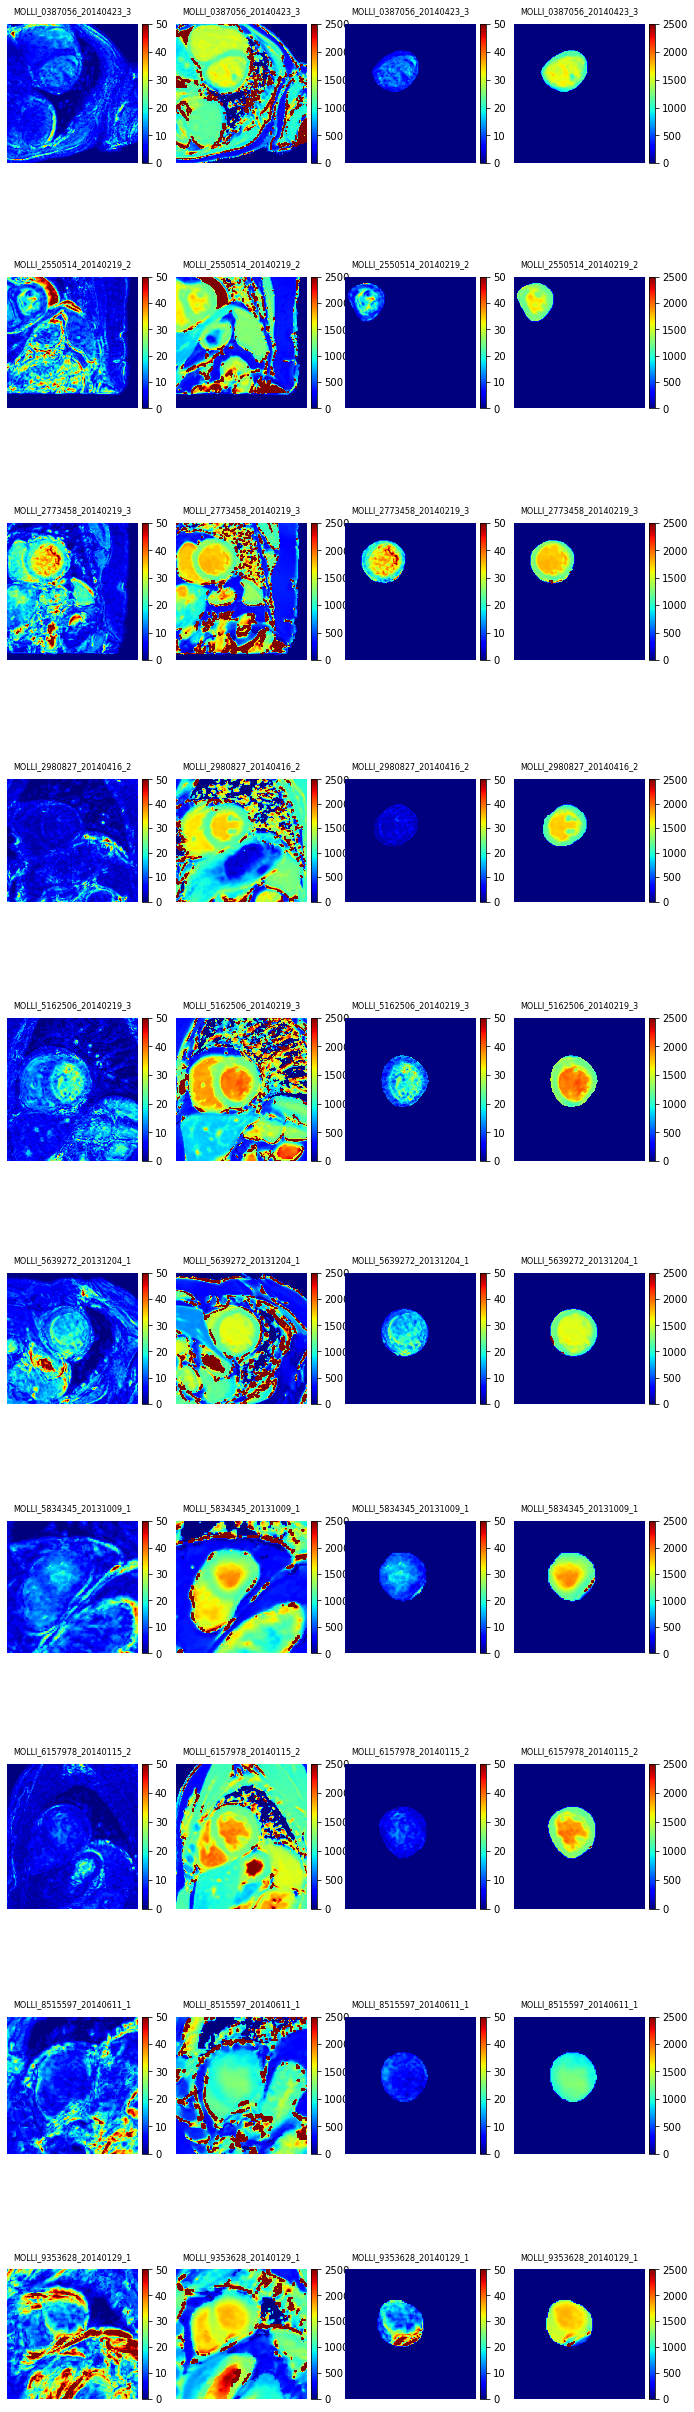

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.io
from pathlib import Path
# %matplotlib widget
path = f"{base_path}/t1_SDerr"
# print(path)
fig = plt.figure(figsize=(10,40))
title_font_size=8
title_pad = 10
r2_t1err_square_list = []
r2_t1err_heart_list = []
subject_list = []

fig, subject_list, r2_t1err_square_list, r2_t1err_heart_list = plot_t1_changes(fig, path, subject_list, r2_t1err_square_list, r2_t1err_heart_list)

print(f"Mean of t1err is {np.mean(np.array(r2_t1err_square_list))} and std is {np.std(np.array(r2_t1err_square_list))}")
print(f"Mean of t1err is {np.mean(np.array(r2_t1err_heart_list))} and std is {np.std(np.array(r2_t1err_heart_list))}")
plt.savefig(f"{base_path}/t1_SDerr.png", dpi=300)

### Round 3

In [14]:
r = 3
base_path = f"{root}/round{r}"

#### First Eigen Component percentage

In [15]:
path = f"{base_path}/moved"
r3_pca_changes = []
for file in sorted(glob.glob(os.path.join(path, '*.npy'))):
    vols = np.load(file).transpose(1, 2, 0)
    eig_org, org_K, org_dis = pca(vols, topk=1)
    r3_pca_changes.append(org_dis)
print(f"Mean of Round 2 PCA is {np.mean(np.array(r3_pca_changes))} and std is {np.std(np.array(r3_pca_changes))}")

Mean of Round 2 PCA is 0.7995993476909996 and std is 0.022927825176628912


#### Jacobian Determination

In [16]:
r3_folding_ratio_list = []
r3_mag_det_jac_det_list = []
path = f"{base_path}/warp"
for file in sorted(glob.glob(os.path.join(path, '*.nii'))):
    disp = vxm.py.utils.load_volfile(file).transpose(2, 3, 0, 1)
    folding_ratio, mag_det_jac_det = jacobian(disp)
    r3_folding_ratio_list.append(folding_ratio)
    r3_mag_det_jac_det_list.append(mag_det_jac_det)

print(f"Mean of folding ratio is {np.mean(np.array(r3_folding_ratio_list))}")
print(f"Mean of mag det jac det is {np.mean(np.array(r3_mag_det_jac_det_list))}")

Mean of folding ratio is 0.0
Mean of mag det jac det is 0.0019102620426565409


#### T1 fitting

Mean of t1err is 9.671761051915736 and std is 4.188744629150605
Mean of t1err is 13.286515150387874 and std is 6.835188611814474


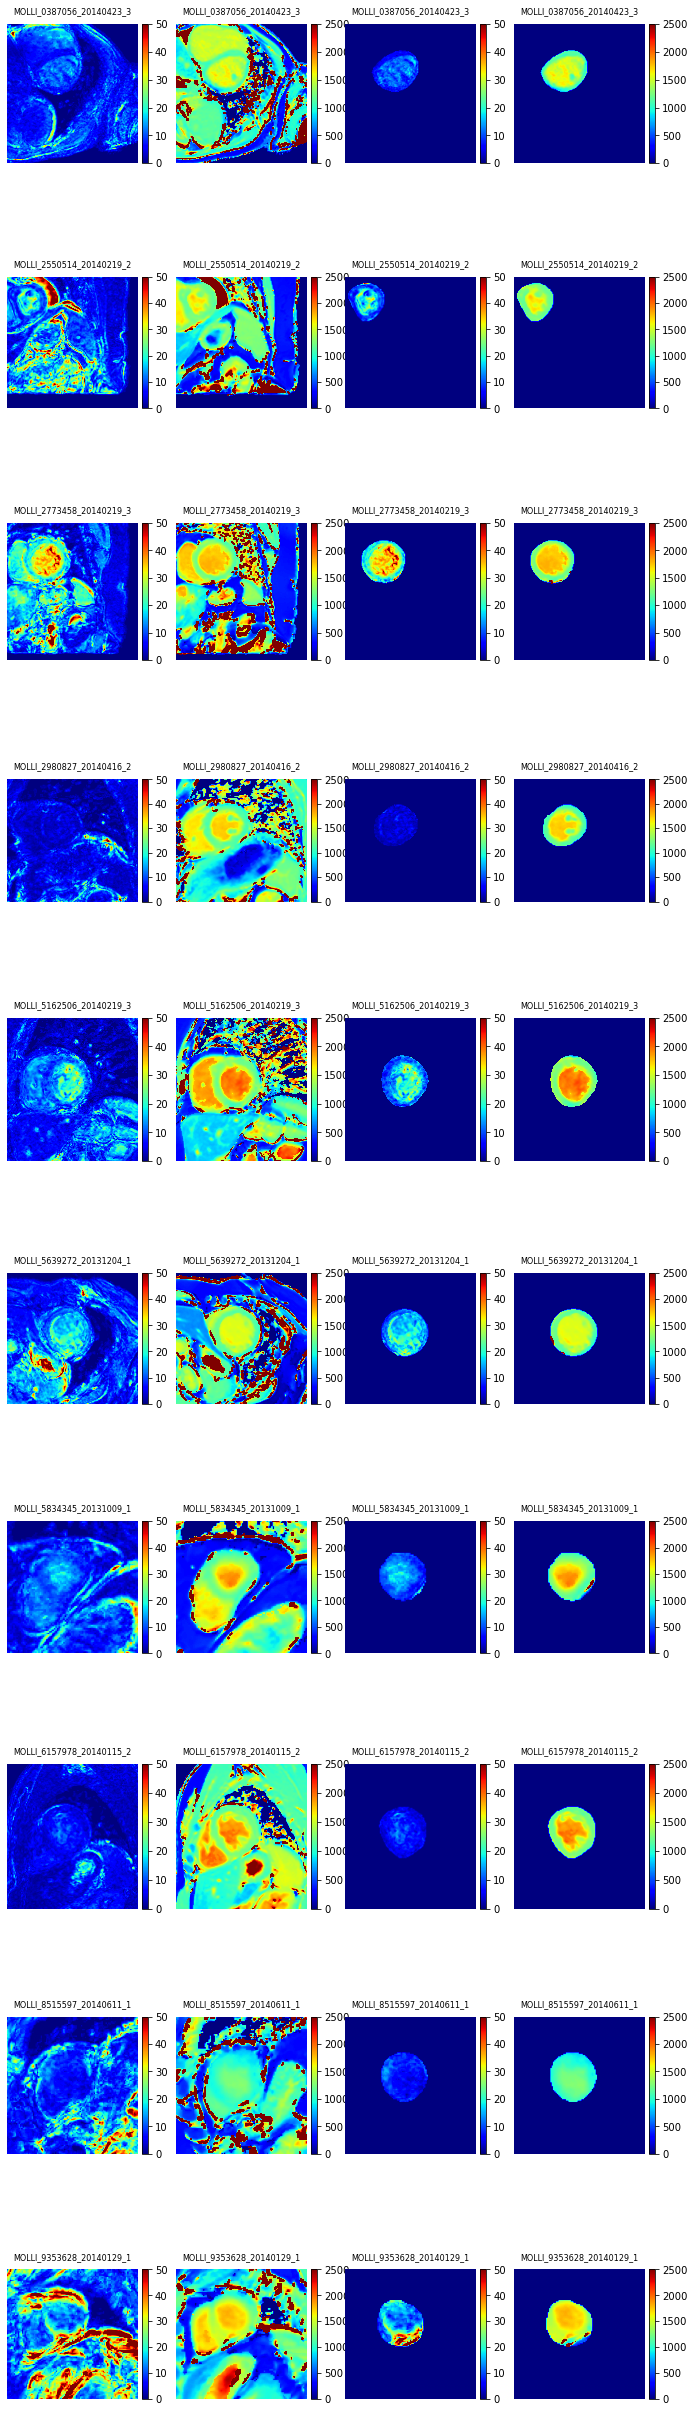

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.io
from pathlib import Path
# %matplotlib widget

path = f"{base_path}/t1_SDerr"
# print(path)
fig = plt.figure(figsize=(10,40))
title_font_size=8
title_pad = 10
r3_t1err_square_list = []
r3_t1err_heart_list = []
subject_list = []

fig, subject_list, r3_t1err_square_list, r3_t1err_heart_list = plot_t1_changes(fig, path, subject_list, r3_t1err_square_list, r3_t1err_heart_list)

print(f"Mean of t1err is {np.mean(np.array(r3_t1err_square_list))} and std is {np.std(np.array(r3_t1err_square_list))}")
print(f"Mean of t1err is {np.mean(np.array(r3_t1err_heart_list))} and std is {np.std(np.array(r3_t1err_heart_list))}")
plt.savefig(f"{base_path}/t1_SDerr.png", dpi=300)

In [23]:
base_path

'results/MOLLI_pre/group/rank_10_5_3/nmi/smooth/image_loss_weight1/cycle_loss_weight0.01/weight0.001/bspline/cps4_svfsteps7_svfscale1/e80/test_MOLLI_pre/round3'

### Summary

In [18]:
import pandas as pd
df = pd.DataFrame()
df['Cases'] = subject_list
df['Raw Square T1err'] = orig_t1err_square_list
df['R1 Square T1err'] = r1_t1err_square_list
df['R2 Square T1err'] = r2_t1err_square_list
df['R3 Square T1err'] = r3_t1err_square_list
df['Square T1err diff'] = (df['Raw Square T1err'] - df['R3 Square T1err']) / df['Raw Square T1err']
df['Raw Heart T1err'] = orig_t1err_heart_list
df['R1 Heart T1err'] = r1_t1err_heart_list
df['R2 Heart T1err'] = r2_t1err_heart_list
df['R3 Heart T1err'] = r3_t1err_heart_list
df['Heart T1err diff'] = (df['Raw Heart T1err'] - df['R3 Heart T1err']) / df['Raw Heart T1err']
df

,Cases,Raw Square T1err,R1 Square T1err,R2 Square T1err,R3 Square T1err,Square T1err diff,Raw Heart T1err,R1 Heart T1err,R2 Heart T1err,R3 Heart T1err,Heart T1err diff
0,MOLLI_0387056_20140423_3,7.539072,7.133117,6.954167,6.877091,0.087807,9.731935,9.713854,9.836752,9.677579,0.005585
1,MOLLI_2550514_20140219_2,12.360840,11.752437,11.374251,11.207392,0.093315,14.576425,14.253446,14.126177,13.880663,0.047732
2,MOLLI_2773458_20140219_3,13.635501,12.140917,11.900642,11.838549,0.131785,28.671655,28.280218,28.075492,27.941390,0.025470
3,MOLLI_2980827_20140416_2,5.785524,5.285074,5.087762,5.006786,0.134601,3.958349,4.003057,3.685635,3.626239,0.083901
4,MOLLI_5162506_20140219_3,8.644283,7.980619,7.802106,7.704652,0.108700,17.141349,16.659972,16.026440,15.682116,0.085129
5,MOLLI_5639272_20131204_1,11.297461,10.262430,10.157282,10.129343,0.103396,17.010539,16.337500,16.131234,16.200639,0.047612
6,MOLLI_5834345_20131009_1,10.555566,8.909747,8.590687,8.620445,0.183327,12.637421,11.978725,11.706072,11.770502,0.068599
7,MOLLI_6157978_20140115_2,5.011841,4.716529,4.595116,4.554637,0.091225,6.933013,6.779116,6.490467,6.433320,0.072075
8,MOLLI_8515597_20140611_1,12.463286,11.395103,10.953542,10.802443,0.133259,7.736930,7.581727,7.465070,7.436678,0.038808
9,MOLLI_9353628_20140129_1,23.435838,20.945784,20.255425,19.976272,0.147619,23.772507,21.980085,20.958985,20.216025,0.149605


In [19]:
df.describe()

,Raw Square T1err,R1 Square T1err,R2 Square T1err,R3 Square T1err,Square T1err diff,Raw Heart T1err,R1 Heart T1err,R2 Heart T1err,R3 Heart T1err,Heart T1err diff
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,11.072921,10.052176,9.767098,9.671761,0.121503,14.217012,13.756770,13.450232,13.286515,0.062452
std,5.232358,4.631821,4.478382,4.415325,0.030292,7.743300,7.418814,7.305008,7.204921,0.039858
min,5.011841,4.716529,4.595116,4.554637,0.087807,3.958349,4.003057,3.685635,3.626239,0.005585
25%,7.815375,7.344992,7.166151,7.083981,0.095835,8.235682,8.114759,8.057991,7.996903,0.041009
50%,10.926513,9.586089,9.373984,9.374894,0.120242,13.606923,13.116086,12.916124,12.825582,0.058166
75%,12.437674,11.663104,11.269074,11.106155,0.134266,17.108646,16.579354,16.105036,16.071008,0.080944
max,23.435838,20.945784,20.255425,19.976272,0.183327,28.671655,28.280218,28.075492,27.941390,0.149605


In [20]:
df_2 = pd.DataFrame()
df_2['Cases'] = subject_list
df_2['Raw PCA'] = orig_pca_changes
df_2['R1 PCA'] = r1_pca_changes
df_2['R2 PCA'] = r2_pca_changes
df_2['R3 PCA'] = r3_pca_changes
df_2['R1 Det'] = r1_mag_det_jac_det_list
df_2['R2 Det'] = r2_mag_det_jac_det_list
df_2['R3 Det'] = r3_mag_det_jac_det_list
df_2['R1 Fold ratio'] = r1_folding_ratio_list
df_2['R2 Fold ratio'] = r2_folding_ratio_list
df_2['R3 Fold ratio'] = r3_folding_ratio_list
df_2

,Cases,Raw PCA,R1 PCA,R2 PCA,R3 PCA,R1 Det,R2 Det,R3 Det,R1 Fold ratio,R2 Fold ratio,R3 Fold ratio
0,MOLLI_0387056_20140423_3,0.806249,0.812158,0.815190,0.816149,0.002040,0.001874,0.001066,0.0,0.0,0.0
1,MOLLI_2550514_20140219_2,0.792254,0.799208,0.801861,0.803734,0.002771,0.002283,0.002064,0.0,0.0,0.0
2,MOLLI_2773458_20140219_3,0.773361,0.781121,0.784263,0.786133,0.002594,0.002315,0.001988,0.0,0.0,0.0
3,MOLLI_2980827_20140416_2,0.813012,0.818502,0.821266,0.823299,0.002549,0.002324,0.001952,0.0,0.0,0.0
4,MOLLI_5162506_20140219_3,0.787799,0.793383,0.795940,0.797662,0.002601,0.002450,0.002011,0.0,0.0,0.0
5,MOLLI_5639272_20131204_1,0.773060,0.778463,0.781255,0.783137,0.002463,0.002337,0.001897,0.0,0.0,0.0
6,MOLLI_5834345_20131009_1,0.757565,0.767632,0.773729,0.776787,0.002866,0.002728,0.002173,0.0,0.0,0.0
7,MOLLI_6157978_20140115_2,0.839774,0.844794,0.847952,0.849798,0.002331,0.002278,0.001742,0.0,0.0,0.0
8,MOLLI_8515597_20140611_1,0.770515,0.779697,0.784518,0.787119,0.002627,0.002562,0.002264,0.0,0.0,0.0
9,MOLLI_9353628_20140129_1,0.754133,0.765911,0.769769,0.772175,0.002550,0.002425,0.001946,0.0,0.0,0.0


In [21]:
df_2.describe()

,Raw PCA,R1 PCA,R2 PCA,R3 PCA,R1 Det,R2 Det,R3 Det,R1 Fold ratio,R2 Fold ratio,R3 Fold ratio
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0
mean,0.786772,0.794087,0.797574,0.799599,0.002539,0.002358,0.001910,0.0,0.0,0.0
std,0.026789,0.025019,0.024464,0.024168,0.000229,0.000221,0.000330,0.0,0.0,0.0
min,0.754133,0.765911,0.769769,0.772175,0.002040,0.001874,0.001066,0.0,0.0,0.0
25%,0.771151,0.778772,0.782007,0.783886,0.002485,0.002291,0.001910,0.0,0.0,0.0
50%,0.780580,0.787252,0.790229,0.792391,0.002572,0.002331,0.001970,0.0,0.0,0.0
75%,0.802750,0.808921,0.811858,0.813045,0.002620,0.002444,0.002050,0.0,0.0,0.0
max,0.839774,0.844794,0.847952,0.849798,0.002866,0.002728,0.002264,0.0,0.0,0.0


In [22]:
df_2.describe()

,Raw PCA,R1 PCA,R2 PCA,R3 PCA,R1 Det,R2 Det,R3 Det,R1 Fold ratio,R2 Fold ratio,R3 Fold ratio
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0
mean,0.786772,0.794087,0.797574,0.799599,0.002539,0.002358,0.001910,0.0,0.0,0.0
std,0.026789,0.025019,0.024464,0.024168,0.000229,0.000221,0.000330,0.0,0.0,0.0
min,0.754133,0.765911,0.769769,0.772175,0.002040,0.001874,0.001066,0.0,0.0,0.0
25%,0.771151,0.778772,0.782007,0.783886,0.002485,0.002291,0.001910,0.0,0.0,0.0
50%,0.780580,0.787252,0.790229,0.792391,0.002572,0.002331,0.001970,0.0,0.0,0.0
75%,0.802750,0.808921,0.811858,0.813045,0.002620,0.002444,0.002050,0.0,0.0,0.0
max,0.839774,0.844794,0.847952,0.849798,0.002866,0.002728,0.002264,0.0,0.0,0.0
